In [3]:
import pandas
from matplotlib import  pyplot
import numpy
import tensorflow_decision_forests as tfdf
import tensorflow as tf

2022-11-01 22:52:46.428992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 22:52:46.541150: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-01 22:52:46.541180: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-01 22:52:46.566327: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-01 22:52:47.209305: W tensorflow/stream_executor/platform/de

In [4]:
df = pandas.read_csv("model/GradientBoostedTreesModel")

In [5]:
model = tf.keras.models.load_model("model/gbtrees.model")

2022-11-01 22:52:49.582799: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-01 22:52:49.582837: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-01 22:52:49.582854: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (prometheus): /proc/driver/nvidia/version does not exist
2022-11-01 22:52:49.583098: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[INFO kernel.cc:1176] Loading model from path model/gbtrees.model/assets/ with prefix 50e96c2287884ee2
[INFO abs

In [12]:
def plot_roc_curve(df):
    # plot ROC cureve from df
    df = df.sort_values(by=['result'])
    sum_customer = df['usertype_int'].value_counts()[0]
    sum_subscriber = df['usertype_int'].value_counts()[1]
    print(sum_customer, sum_subscriber)
    df['truepositives'] = df['usertype_int'].expanding(min_periods=1).sum()
    df['falsepositives'] = (df['usertype_int'].expanding(min_periods=1).count())
    df['falsepositives'] = (df['falsepositives'] - df['truepositives'])
    df['truepositives'] = df['truepositives']/sum_subscriber
    df['falsepositives'] = df['falsepositives']/sum_customer
    print(df[['truepositives', 'falsepositives']])
    pyplot.plot(df['truepositives'], df['falsepositives'])
    pyplot.xlabel("false positives", size=16)
    pyplot.ylabel("true positives (subscribers)", size=16)
    pyplot.show()
    return df

58345 468627
        truepositives  falsepositives
227169       0.000000        0.000017
272760       0.000000        0.000034
121152       0.000000        0.000051
114179       0.000000        0.000069
111390       0.000000        0.000086
...               ...             ...
185576       0.999991        1.000000
132718       0.999994        1.000000
435245       0.999996        1.000000
226515       0.999998        1.000000
159154       1.000000        1.000000

[526972 rows x 2 columns]


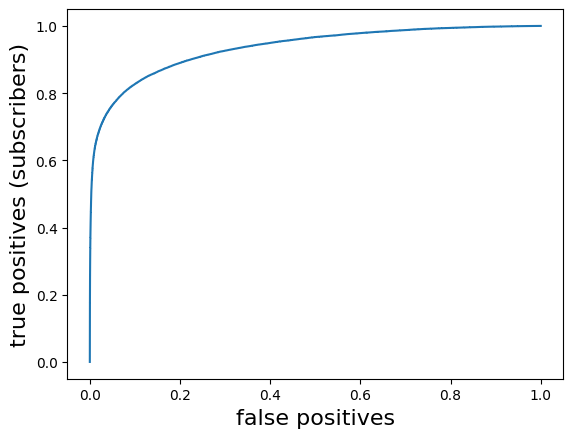

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,usertype,birth year,gender,usertype_int,dayofweek,weekofyear,hour,result,truepositives,falsepositives
227169,755330,6656,2018-07-02 14:13:35.284,2018-07-02 16:04:31.496,321.0,Cadman Plaza E & Red Cross Pl,40.699918,-73.989718,387.0,Centre St & Chambers St,...,Customer,1969,0,0,0,27,14,0.001356,0.000000,0.000017
272760,906600,6368,2018-04-28 15:45:27.682,2018-04-28 17:31:36.124,217.0,Old Fulton St,40.702772,-73.993836,232.0,Cadman Plaza E & Tillary St,...,Customer,1969,0,0,5,17,15,0.001415,0.000000,0.000034
121152,402410,3339,2018-06-16 14:08:29.839,2018-06-16 15:04:09.097,321.0,Cadman Plaza E & Red Cross Pl,40.699918,-73.989718,387.0,Centre St & Chambers St,...,Customer,1969,0,0,5,24,14,0.001452,0.000000,0.000051
114179,379364,7545,2018-06-19 12:16:57.482,2018-06-19 14:22:43.079,321.0,Cadman Plaza E & Red Cross Pl,40.699918,-73.989718,387.0,Centre St & Chambers St,...,Customer,1969,0,0,1,25,12,0.001536,0.000000,0.000069
111390,369815,2840,2018-06-02 14:21:50.531,2018-06-02 15:09:10.540,232.0,Cadman Plaza E & Tillary St,40.695977,-73.990149,387.0,Centre St & Chambers St,...,Customer,1969,0,0,5,22,14,0.001554,0.000000,0.000086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185576,616386,226,2018-01-31 07:30:08.640,2018-01-31 07:33:55.572,339.0,Avenue D & E 12 St,40.725806,-73.974225,433.0,E 13 St & Avenue A,...,Subscriber,1952,1,1,2,5,7,0.999236,0.999991,1.000000
132718,441068,100,2018-06-22 17:37:58.921,2018-06-22 17:39:39.072,3632.0,E 12 St & Avenue B,40.728049,-73.978812,433.0,E 13 St & Avenue A,...,Subscriber,1900,1,1,4,25,17,0.999250,0.999994,1.000000
435245,1448731,86,2018-02-06 08:19:13.897,2018-02-06 08:20:40.579,432.0,E 7 St & Avenue A,40.726218,-73.983799,317.0,E 6 St & Avenue B,...,Subscriber,1945,1,1,1,6,8,0.999261,0.999996,1.000000
226515,753195,228,2018-07-24 18:54:20.607,2018-07-24 18:58:08.785,487.0,E 20 St & FDR Drive,40.733143,-73.975739,174.0,E 25 St & 1 Ave,...,Subscriber,1900,1,1,1,30,18,0.999262,0.999998,1.000000


In [13]:
plot_roc_curve(df)